# E10: Insurance Claims- Fraud Detection


## Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE
import os

In [2]:
#importing dataset
os.chdir("C:\GitBash\Files")
df = pd.read_csv("Automobile_insurance_fraud.csv")

### DATA INSPECTION

In [3]:
df.head(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.sample(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
102,279,41,389238,06-06-2001,IL,250/500,500,1497.35,0,460742,...,NO,28800,0,3600,25200,Ford,Fusion,2013,N,NaN
91,61,23,127754,06-06-1993,IL,250/500,2000,1136.83,4000000,471300,...,?,98340,8940,17880,71520,Honda,Accord,2004,Y,NaN
897,178,39,305758,08-03-2009,IL,100/300,500,1035.99,0,465252,...,?,64680,11760,11760,41160,Jeep,Wrangler,2010,N,NaN
569,165,35,976908,31-12-2012,IL,250/500,500,900.02,6000000,448466,...,YES,69700,6970,6970,55760,BMW,3 Series,2008,N,NaN
100,269,41,797613,19-10-1990,IN,100/300,500,1463.82,0,448984,...,?,79300,15860,15860,47580,Saab,92x,2007,N,NaN


In [5]:
df.tail(5)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [6]:
#checking column names
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
#shape of data
df.shape

(1000, 40)

In [8]:
#datatypes of all columns
df.dtypes 

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [9]:
#information of all columns from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
df.nunique().to_frame("Unique Values")

,Unique Values
months_as_customer,391
age,46
policy_number,1000
policy_bind_date,951
policy_state,3
policy_csl,3
policy_deductable,3
policy_annual_premium,991
umbrella_limit,11
insured_zip,995


OBSERVATION

We have 1000 rows and 40 columns out of which 1 is a target variable.

we have object,float  and int datatypes columns data. .

info method verifies about the dataset there is no null values in the dataset.

Here the column _c39 has 0 non null values which means it has NaN throughout the data so we can drop this column. 

We can observe the columns “policy_number” and “incident_location” have 1000 unique values. So, it not required for the prediction so we can drop it.

In [11]:
df.drop("_c39",axis=1,inplace=True)

In [12]:
df.drop("policy_number",axis=1,inplace=True)
df.drop("incident_location",axis=1,inplace=True)


In [13]:
#checking null values
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_cla

In [14]:
#checking the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())

194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: months_as_customer, Length: 391, dtype: int64
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: age, dtype: int64
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: policy_bind_date, Length: 951, dtype: int64
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64
1000    351
500     342
2000    307
Name: p

OBSERVATION

There are no null values present in dataset.

By looking at the value counts of each column we can realize that the columns umbrella_limit, capital-gains and capital-loss contains more zero values around 79.8%, 50.8% and 47.5%. I am keeping the zero values in capital_gains and capital_loss columns as it is. Since the umbrella_limit column has more than 70% of zero values, let's drop that column.


The column insured_zip is the zip code given to each person. If we take a look at the value count and unique values of the column insured_zip, it contains 995 unique values that mean the 5 entries are repeating. Hence, we will drop it too.

In [15]:
df.drop("umbrella_limit",axis=1,inplace=True)

In [16]:
df.drop("insured_zip",axis=1,inplace=True)

### FEATURE EXTRACTION 

The policy_bind_date and incident_date have object data type which should be in datetime data type that means the python is not able to understand the type of this column and giving default data type. We will convert this object data type to datetime data type and we will extract the values from these columns.
 


In [17]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [18]:
#extracting DAY,MONTH AND YEAR from policy_bind_date and incident_date
df["policy_bind_day"] = pd.to_datetime(df.policy_bind_date, format="%d/%m/%Y").dt.day
df["incident_day"] = pd.to_datetime(df.incident_date, format="%d/%m/%Y").dt.day


In [19]:
#After we have extracted Day, Month and Year columns, from both policy_bind_date and incident_date columns, drop these columns
df.drop("policy_bind_date",axis=1,inplace=True)
df.drop("incident_date",axis=1,inplace=True)

We have dropped the columns policy_bind_date and incident_date as we have extracted the required data from those columns.
From the value counts of the columns we can also observe the some columns have \"?\" values, they are not NAN values but we need to fill them.


In [20]:
# Checking which columns contains \"?\" sign
df[df.columns[(df == '?').any()]].nunique()

collision_type             4
property_damage            3
police_report_available    3
dtype: int64

These are the columns which contains \"?\" sign. Since these column seems to be categorical so we will replace \"?\" values with most frequently occuring values of the respective columns that is their mode values.

In [22]:
# Checking mode of the above columns
print("The mode of collision_type is:",df["collision_type"].mode())
print("The mode of property_damage is:",df["property_damage"].mode())
print("The mode of police_report_available is:",df["police_report_available"].mode())

The mode of collision_type is: 0    Rear Collision
dtype: object
The mode of property_damage is: 0    ?
dtype: object
The mode of police_report_available is: 0     ?
1    NO
dtype: object


The mode of property_damage and police_report_available is \"?\", which means the data is almost covered by \"?\" sign. So we will fill them by the second highest count of the respective column.

In [23]:
# Checking value count of property_damage column and police_report_available\n",
print("The value count of property_damage:", df["property_damage"].value_counts())
print("The value count of police_report_available:", df["police_report_available"].value_counts())

The value count of property_damage: ?      360
NO     338
YES    302
Name: property_damage, dtype: int64
The value count of police_report_available: ?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


Here \"NO\" is the second highest occured category in both property_damage and police_report_available column. We will replace \"?\" by \"NO\"."

In [24]:
#Replacing \"?\" by their mode values
df['collision_type'] = df.collision_type.str.replace('?', df['collision_type'].mode()[0])
df['property_damage'] = df.property_damage.str.replace('?', "NO")
df['police_report_available'] = df.police_report_available.str.replace('?', "NO")

In [25]:
# Checking value count again
print("The value count of collision_type:", df["collision_type"].value_counts())
print("The value count of property_damage:", df["property_damage"].value_counts())
print("The value count of police_report_available:", df["police_report_available"].value_counts())

The value count of collision_type: Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64
The value count of property_damage: NO     698
YES    302
Name: property_damage, dtype: int64
The value count of police_report_available: NO     686
YES    314
Name: police_report_available, dtype: int64


we have replaced the \"?\" sign by mode and \"NO\" values.

The policy_csl column showing object data type but it contains numerical data, may be it is because of the presence of \"/\" in that column. So first we will extract two columns csl_per_person and csl_per_accident from policy_csl colums and then will convert their object data type into integer data type."

In [26]:
# Extracting csl_per_person and csl_per_accident from policy_csl column\n",
df['csl_per_person'] = df.policy_csl.str.split('/', expand=True)[0]
df['csl_per_accident'] = df.policy_csl.str.split('/', expand=True)[1]

In [27]:
# Converting object data type into integer data type
df['csl_per_person'] = df['csl_per_person'].astype('int64')
df['csl_per_accident'] = df['csl_per_accident'].astype('int64')

In [28]:
# Since we have extracted the data from policy_csl, let's drop that column,
df.drop("policy_csl",axis=1,inplace=True)

In [29]:
# Let's extract age of the vehicle from auto_year by subtracting it from the year 2018\n",
df["Vehicle_Age"] = 2018 - df["auto_year"]
df.drop("auto_year",axis=1, inplace = True)


Here we have extracted age of the vehicle on the basis of auto year by assuming the data is collected in the year 2018.

In [30]:
# Let's check the unique values again
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
months_as_customer,391
age,46
policy_state,3
policy_deductable,3
policy_annual_premium,991
insured_sex,2
insured_education_level,7
insured_occupation,14
insured_hobbies,20
insured_relationship,6


In [32]:
# Let's take a look at the dataframe after preprocessing
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,policy_bind_day,incident_day,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,13020,52080,Saab,92x,Y,17,25,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,780,3510,Mercedes,E400,Y,27,21,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,3850,23100,Dodge,RAM,N,9,22,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,6340,50720,Chevrolet,Tahoe,Y,25,1,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,650,4550,Accura,RSX,N,6,17,500,1000,9


In [33]:
# Separating numerical and categorcal columns

# Checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print("Categorical columns are:",categorical_col)

Categorical columns are: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [34]:
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print("Numerical columns are:",numerical_col)

Numerical columns are: ['months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'incident_day', 'csl_per_person', 'csl_per_accident', 'Vehicle_Age']


In [35]:
# Checking the list of counts of target
df['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

There are two unique categories in fraud_reported column these values tells about if an insurance claim is fraudulent or not. Here we can assume that \"Y\" stands for \"Yes\" that is the insurance is fraudulent and \"N\" stands for \"No\" means the insurance claim is not fraudulent.

In [36]:
# Checking the unique values in target column
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

From the value count of the target column fraud_reported we can notice the count of the categories are different which means the data is not balanced. We will use oversampling method to balance the data before building the models

### STATISTICAL SUMMARY

In [37]:
# Statistical summary of numerical columns
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,NaN,NaN,NaN,203.954,115.113174,0.0,115.75,199.5,276.25,479.0
age,1000.0,NaN,NaN,NaN,38.948,9.140287,19.0,32.0,38.0,44.0,64.0
policy_state,1000,3,OH,352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_deductable,1000.0,NaN,NaN,NaN,1136.0,611.864673,500.0,500.0,1000.0,2000.0,2000.0
policy_annual_premium,1000.0,NaN,NaN,NaN,1256.40615,244.167395,433.33,1089.6075,1257.2,1415.695,2047.59
insured_sex,1000,2,FEMALE,537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_education_level,1000,7,JD,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_occupation,1000,14,machine-op-inspct,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_hobbies,1000,20,reading,64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
insured_relationship,1000,6,own-child,183,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We use the \"describe\" method along with it's parameter \"all\" to include each and every column present in our dataset irrespective of them being numeric or text data. I have also used the transpose option to make sure that we are able to see the column information properly without having to scroll through multiple times

### DATA VISUALISATION

#### Univariate Analysis (Categorical Columns)

N    753
Y    247
Name: fraud_reported, dtype: int64


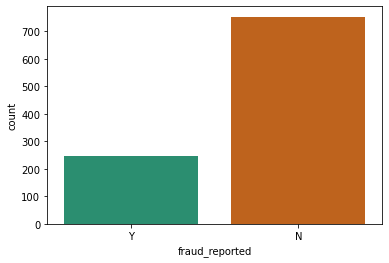

In [38]:
#Visualizing how many insurance claims is fraudulent
print(df["fraud_reported"].value_counts())
sns.countplot(df["fraud_reported"],palette="Dark2")
plt.show()

From the plot we can observe that the count of \"N\" is high compared to \"N\". We can assume that \"Y\" stands for \"Yes\" that is the insurance is fraudulent and \"N\" stands for \"No\" means the insurance claim is not fraudulent. Here most of the insurance claims have not reported as fradulent.\n",
    "\n",
    "Since it is our target column, it indicates the class imbalance issue. We will balance the data using oversampling method in later part.

Pie plot for the column: policy_state


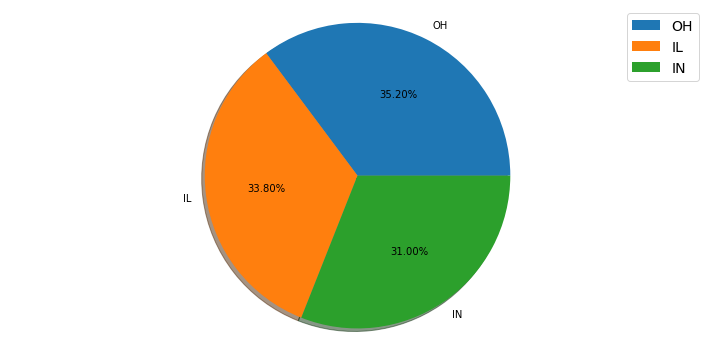

Pie plot for the column: insured_sex


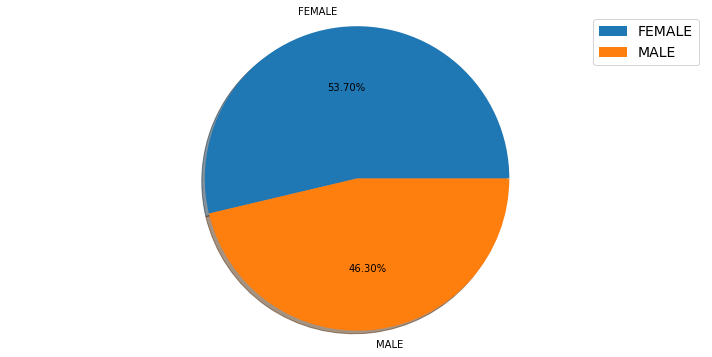

Pie plot for the column: insured_education_level


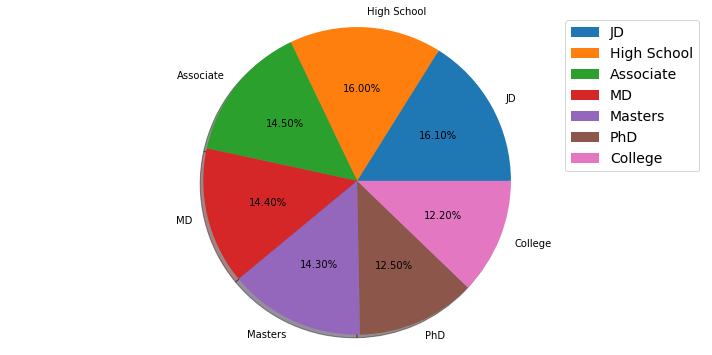

Pie plot for the column: insured_relationship


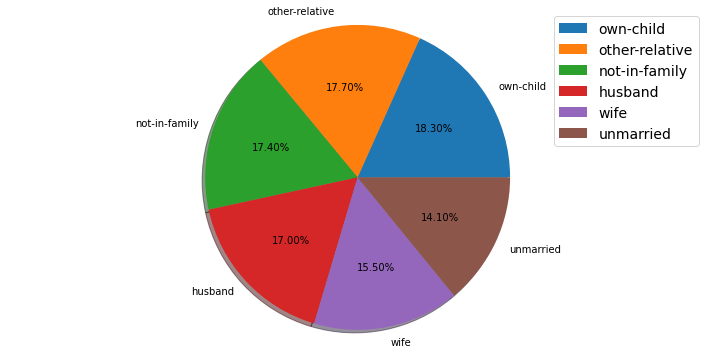

Pie plot for the column: incident_type


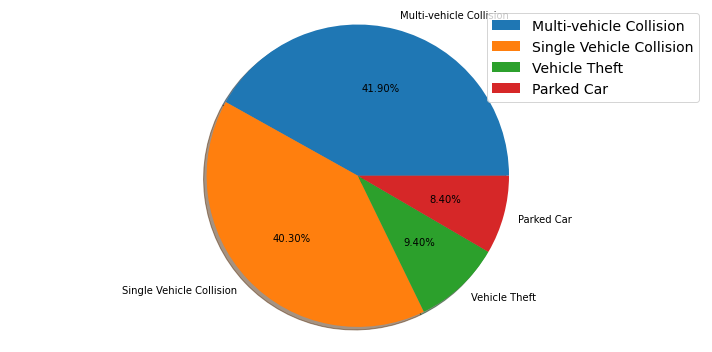

Pie plot for the column: collision_type


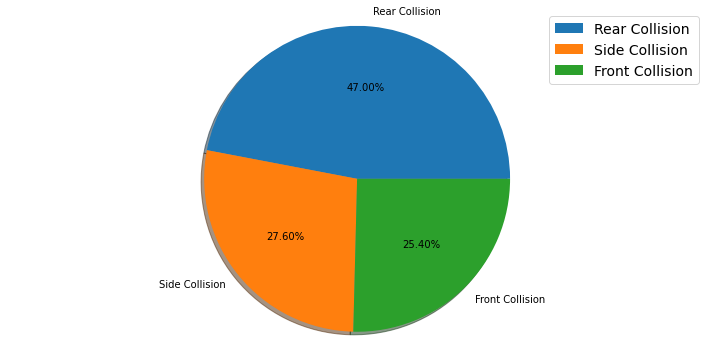

Pie plot for the column: property_damage


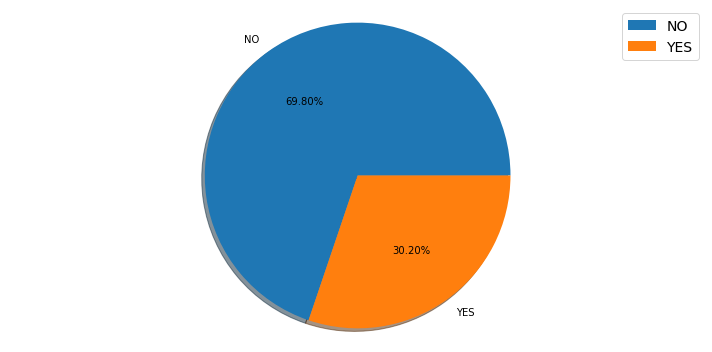

Pie plot for the column: police_report_available


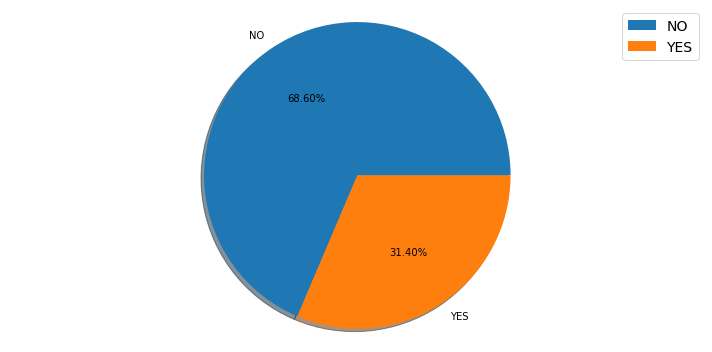

In [40]:
def generate_pie(i):
    plt.figure(figsize=(10,5))
    plt.pie(i.value_counts(), labels=i.value_counts().index, autopct='%1.2f%%',shadow=True,)
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()

cols1 = ['policy_state', 'insured_sex', 'insured_education_level','insured_relationship', 'incident_type','collision_type','property_damage','police_report_available']

plotnumber=1
for j in df[cols1]:
    print(f"Pie plot for the column:", j)
    generate_pie(df[j])

OBSERVATION

Above are the pie plots for some of the categorical columns. From the above pie plots we can observe the following things:\n",
 

The types of the policies claimed by the customers are almost same but still the policy state type HO has bit high counts and the type IL has bit less count. Both male and female have insurance but the count for Female is higher than Male counts. The count is pretty much same for all the education level but still the people who have completed their college and PhD have less count compared to others. Similar to insured education, insured relationship is also almost equally distributed. While looking at the incident type, Multi-vehicle collision and Single Vehicle Collision have pretty much similar counts of around 41.9% and 40.3%. But the count is very less in Parked car and Vehicle Theft. The collision type has 3 different types . In this the count is high in Rear collision and the other two types have almost equal counts. As we observe the propert damage plot, around 69.8% of the people did not face any property damage while 30.2% of the people faced the property damage. About 68.6% of the people produced the police reports while 31.4% of the people didn't submit any police reports.

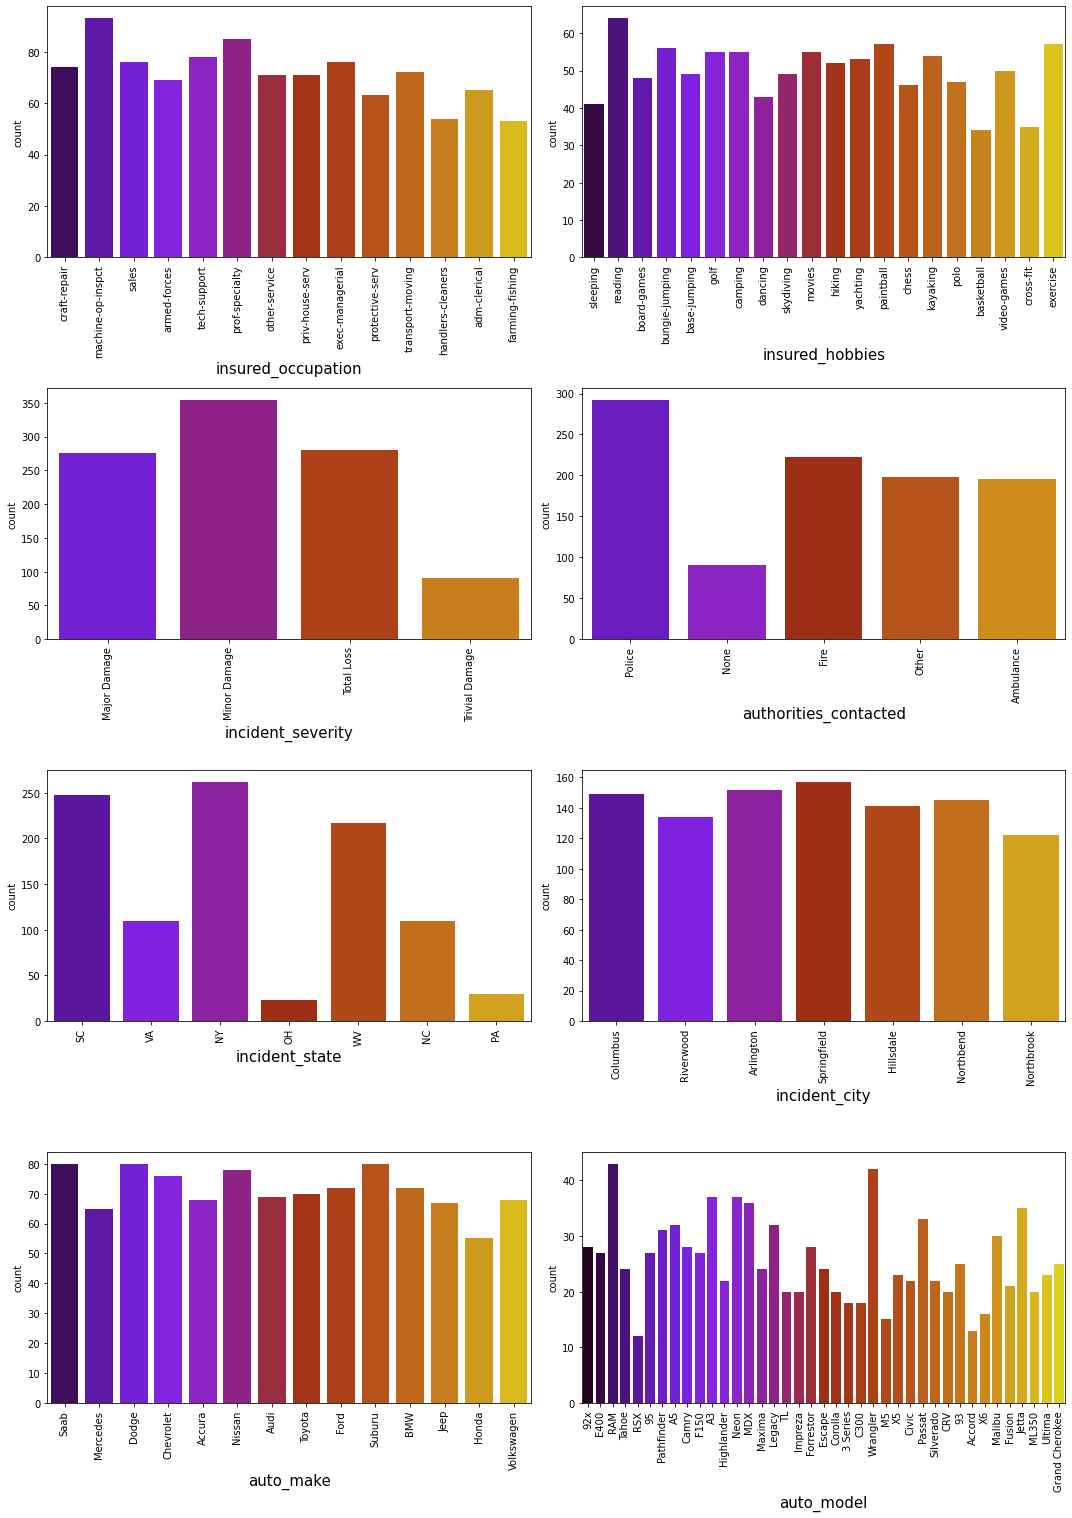

In [41]:
cols2 = ['insured_occupation', 'insured_hobbies', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city','auto_make', 'auto_model']

plt.figure(figsize=(15,25),facecolor='white')
plotnumber=1
for column in cols2:
    if plotnumber:
        ax=plt.subplot(5,2,plotnumber)
        sns.countplot(df[column],palette="gnuplot")
        plt.xticks(rotation=90)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()
plt.show()

OBSERVATION


"Above are the count plots for the remaining categorical columns. From the count plots we can observe the following things:


"In the insured occupation we can observe most of the data is covered by machine operation inspector followed by professional speciality. Apart from this all the other insured occupations have almost same counts. With respect to insured hobbies, we can notice reading covered the highest data followed by exercise. And other categories have the average counts. The incident severity count is high for Minor damages and trivial damage data has very less count compared to others. When the accidents occurs then most of the authorities contacts the police, here the category police covers highest data and Fire having the second highest count. But Ambulance and Others have almost same counts and the count is very less for None compared to all others. With respect to the incident state, New York, South Carolina and West Virginia states have highest counts. In incident city, almost all the columns have equal counts. When we look at the vehicle manufactured companies, the categories Saab, Suburu, Dodge, Nissan and Volkswagen have highest counts. When we take a look at the vehicle models then RAM and Wrangler automobile models have highest counts and also RSX and Accord have very less count."

### Checking the Distribution of the dataset(numerical columns)

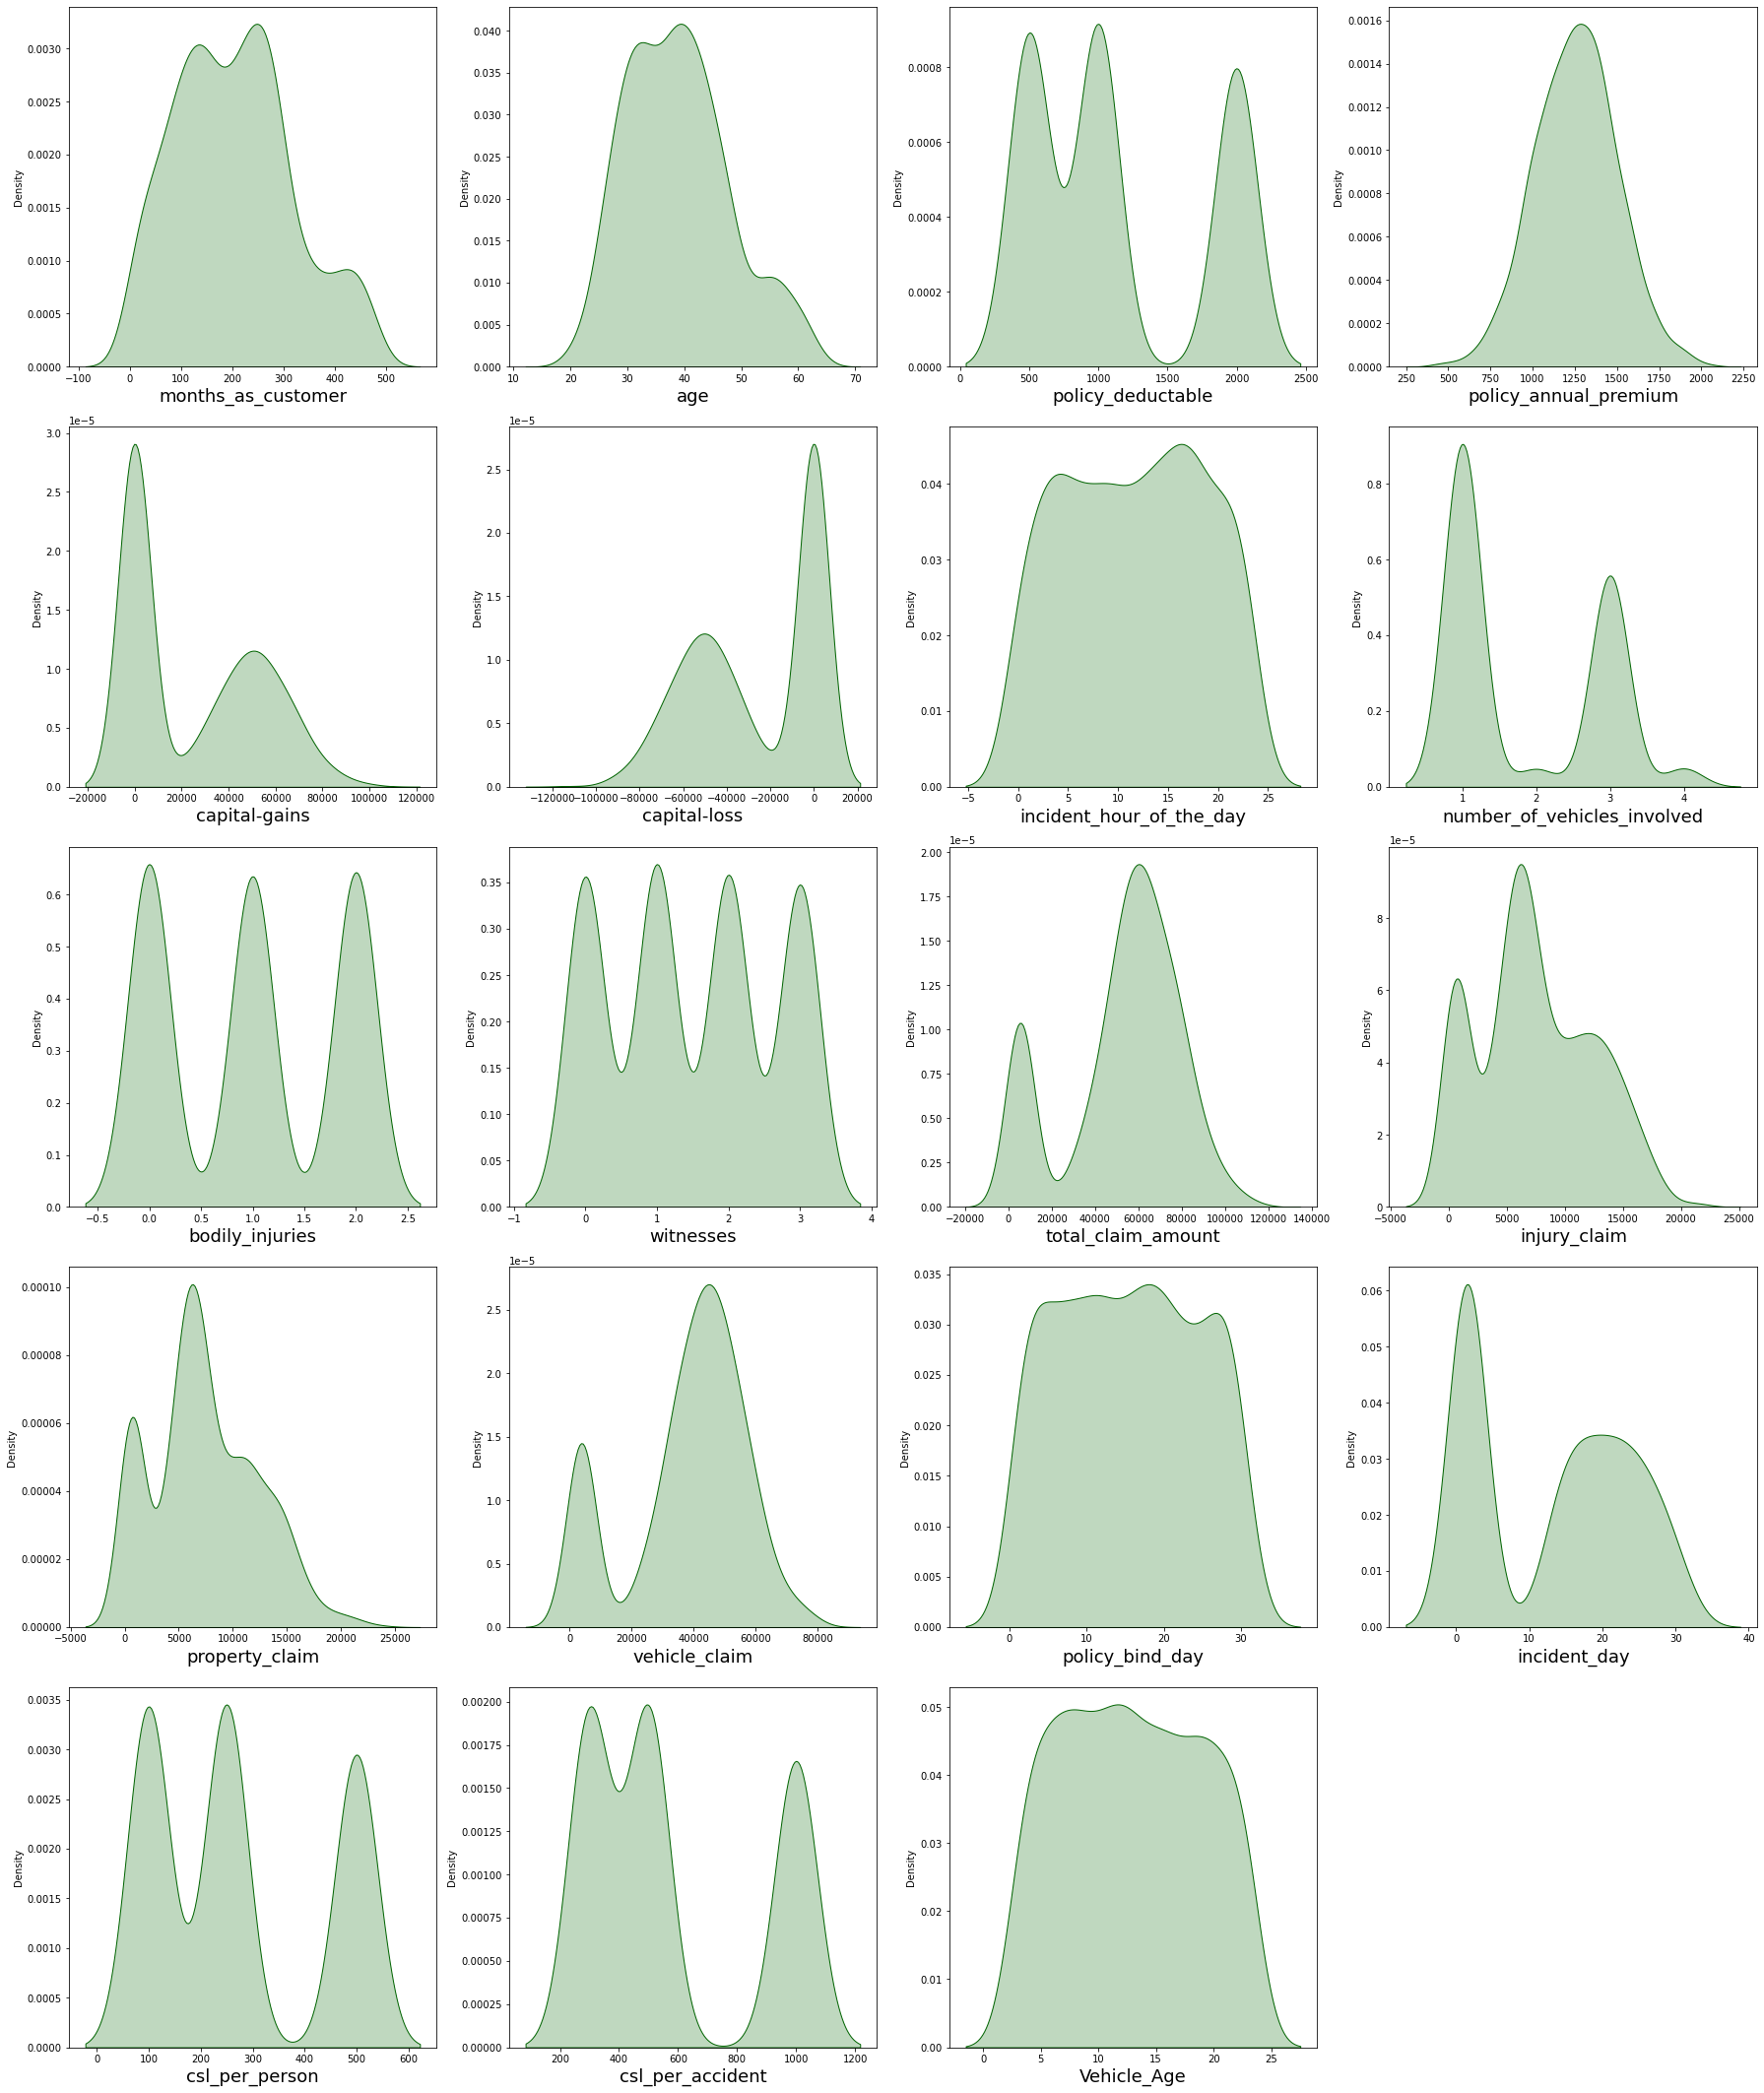

In [43]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color="darkgreen",hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=18)
    plotnumber+=1
plt.tight_layout()

OBSERVATION

Above are the distribution plots for all the numerical columns. From the distplots we can observe the following things:

The data is normally distributed in most of the columns. Some of the columns like capital gains and incident months have mean value greater than the median, hence they are skewed to left. The data in the column capital loss is skewed to right since the median is greater than the mean. We will remove the skewness using appropriate methods in the later part.

#### BIVARIATE ANALYSIS

<AxesSubplot:title={'center':'Comparision between months_as_customer and total_claim_amount'}, xlabel='months_as_customer', ylabel='total_claim_amount'>

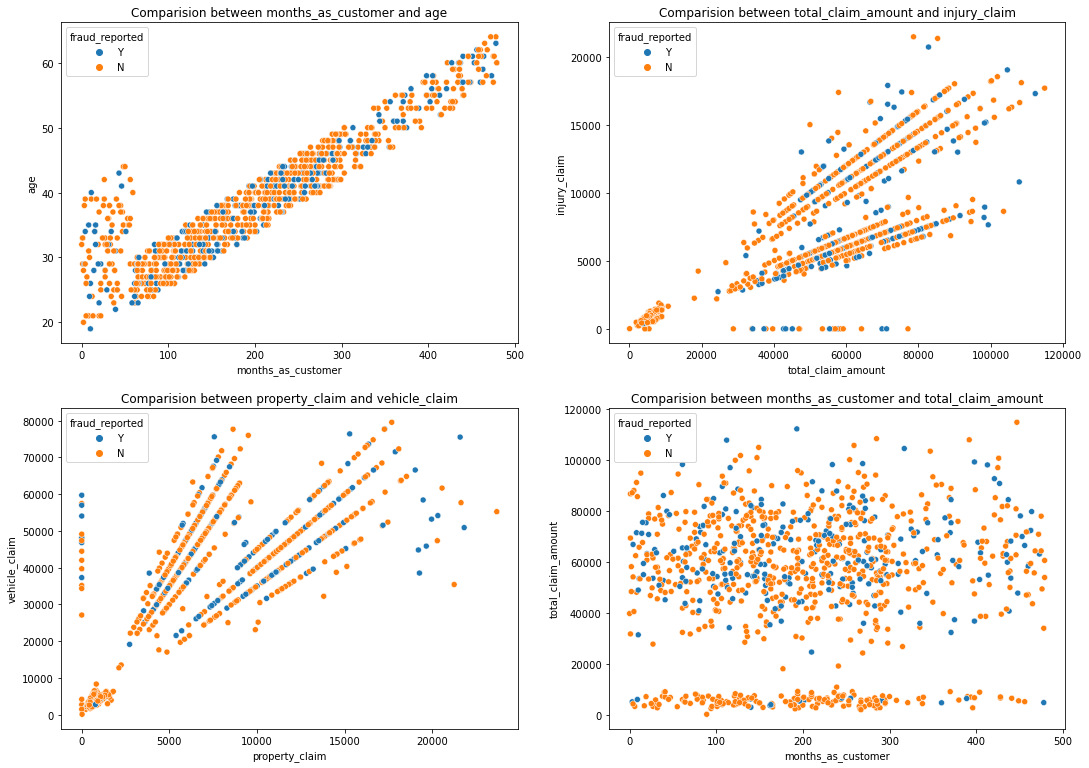

In [46]:
# Comparision between two variables
plt.figure(figsize=[18,13])

plt.subplot(2,2,1)
plt.title('Comparision between months_as_customer and age')
sns.scatterplot(df['months_as_customer'],df['age'],hue=df['fraud_reported'])

plt.subplot(2,2,2)
plt.title('Comparision between total_claim_amount and injury_claim')
sns.scatterplot(df['total_claim_amount'],df['injury_claim'],hue=df['fraud_reported'])

plt.subplot(2,2,3)
plt.title('Comparision between property_claim and vehicle_claim')
sns.scatterplot(df['property_claim'],df['vehicle_claim'],hue=df['fraud_reported'])

plt.subplot(2,2,4)
plt.title('Comparision between months_as_customer and total_claim_amount')
sns.scatterplot(df['months_as_customer'],df['total_claim_amount'],hue=df['fraud_reported'])

OBSERVATION

From the above scatter plot we can observe the following things:


There is a positive linear relation between age and month_as_customer column. As age increases the month_as customers also increases, also the fraud reported is very less in hits case. In the second graph we can observe the positive linear relation, as total claim amount increases, injury claim is also increases. Third plot is also same as second one that is as the property claim increases, vehicle claim also increases. In the fourth plot we can observe the data is scattered and there is no much relation between the features.

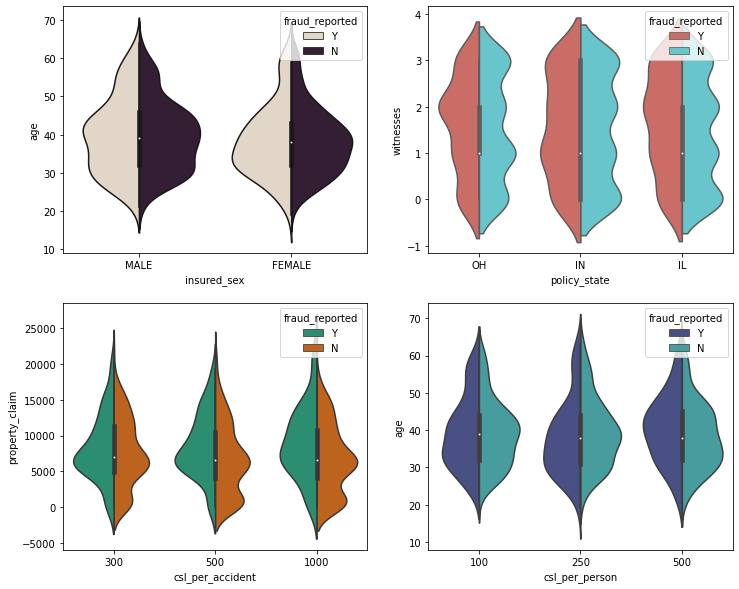

In [47]:
fig,axes=plt.subplots(2,2,figsize=(12,10))

# Comparing insured_sex and age
sns.violinplot(x='insured_sex',y='age',ax=axes[0,0],data=df,palette="ch:.25",hue="fraud_reported",split=True)

# Comparing policy_state and witnesses
sns.violinplot(x='policy_state',y='witnesses',ax=axes[0,1],data=df,hue="fraud_reported",split=True,palette="hls")

# Comparing csl_per_accident and property_claim
sns.violinplot(x='csl_per_accident',y='property_claim',ax=axes[1,0],data=df,hue="fraud_reported",split=True,palette="Dark2")

# Comparing csl_per_person and age
sns.violinplot(x='csl_per_person',y='age',ax=axes[1,1],data=df,hue="fraud_reported",split=True,palette="mako")
plt.show()

### OUTLIERS

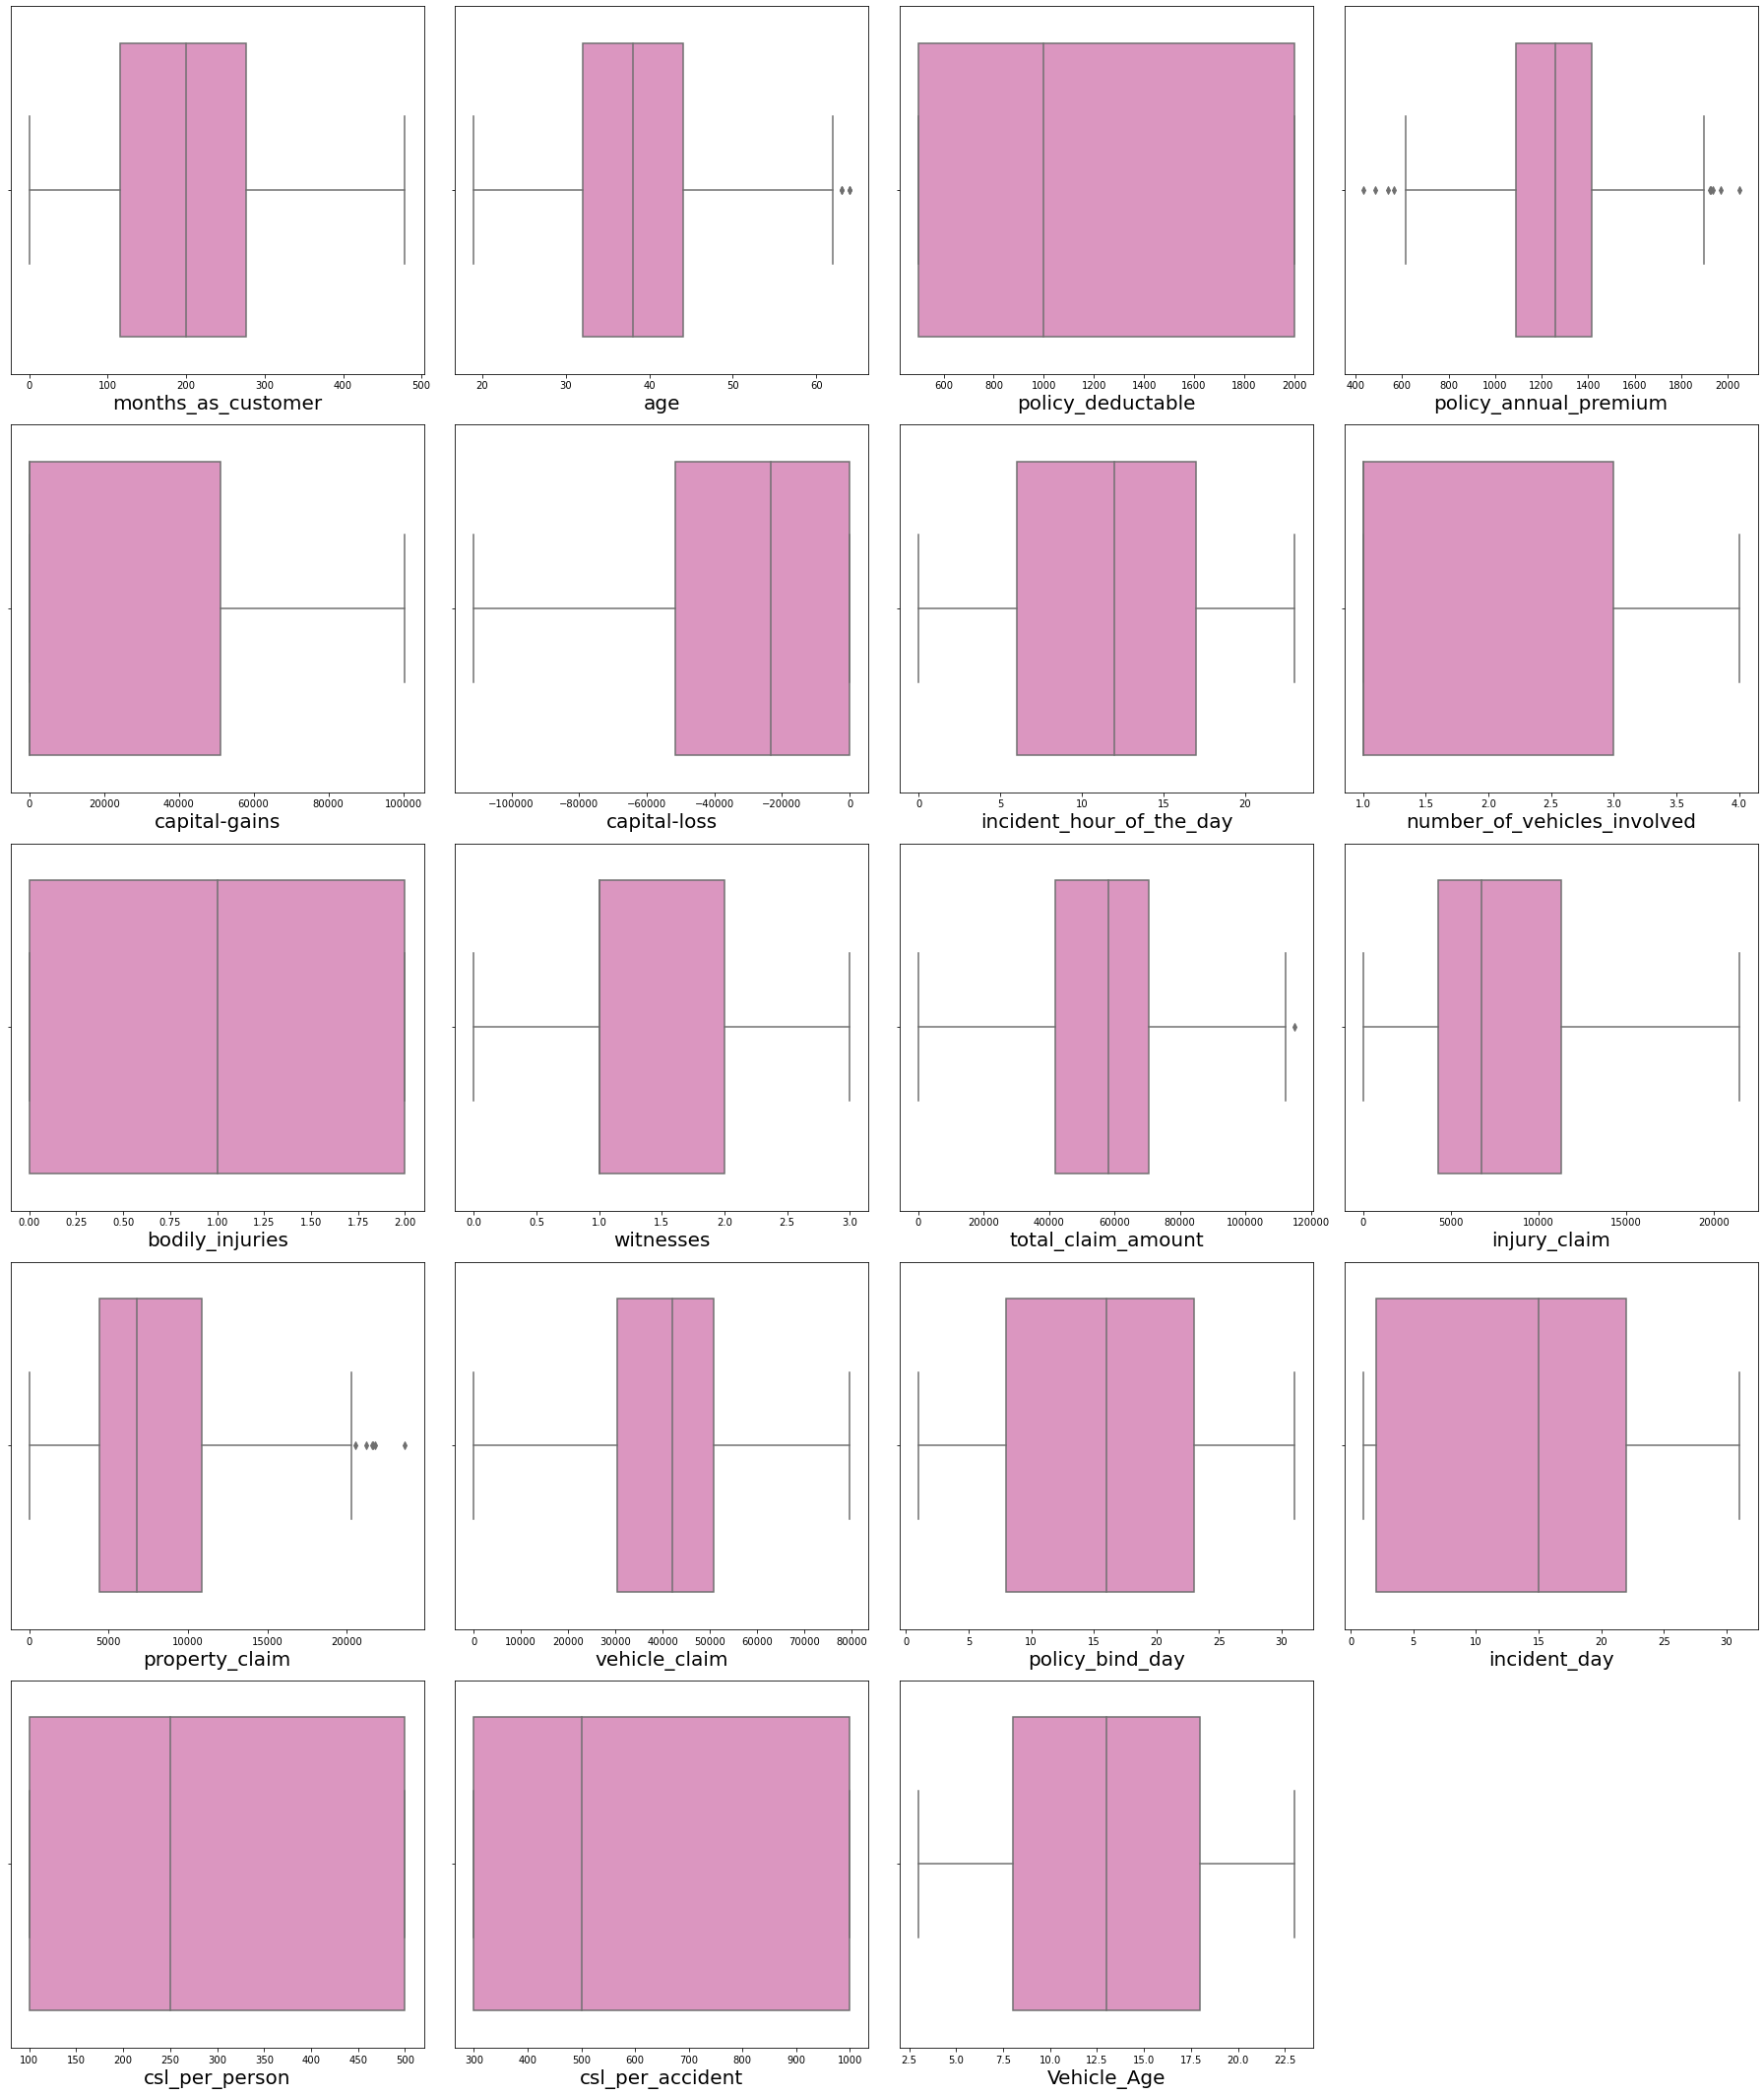

In [51]:
# Let's check the outliers by ploting box plot\
plt.figure(figsize=(25,35),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],palette="Set2_r")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

OBSERVATION

We can find the outliers in the following columns:

age policy_annual_premium , total_claim_amount , property_claim and incident_month.

These are the numerical columns which contains outliers. Removing the outliers in these columns using Zscore method.

##### Removing outliers

In [54]:
# Feature containing outliers
features = df[['age','policy_annual_premium','total_claim_amount','property_claim']]

In [56]:
#USING Z SCORE
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,age,policy_annual_premium,total_claim_amount,property_claim
0,0.990836,0.616705,0.714257,1.165505
1,0.334073,0.242521,1.807312,1.372696
2,1.088913,0.642233,0.686362,0.736072
3,0.224613,0.652886,0.403135,0.219722
4,0.552994,1.341980,1.753121,1.399654
...,...,...,...,...
995,0.103769,0.222884,1.305049,0.273817
996,0.224613,0.739141,2.111466,2.214794
997,0.541611,0.520739,0.558507,0.020826
998,2.523284,0.411866,0.219110,0.451976


In [57]:
#Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,policy_bind_day,incident_day,csl_per_person,csl_per_accident,Vehicle_Age
0,328,48,OH,1000,1406.91,MALE,MD,craft-repair,sleeping,husband,...,13020,52080,Saab,92x,Y,17,25,250,500,14
1,228,42,IN,2000,1197.22,MALE,MD,machine-op-inspct,reading,other-relative,...,780,3510,Mercedes,E400,Y,27,21,250,500,11
2,134,29,OH,2000,1413.14,FEMALE,PhD,sales,board-games,own-child,...,3850,23100,Dodge,RAM,N,9,22,100,300,11
3,256,41,IL,2000,1415.74,FEMALE,PhD,armed-forces,board-games,unmarried,...,6340,50720,Chevrolet,Tahoe,Y,25,1,250,500,4
4,228,44,IL,1000,1583.91,MALE,Associate,sales,board-games,unmarried,...,650,4550,Accura,RSX,N,6,17,500,1000,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,1000,1310.80,FEMALE,Masters,craft-repair,paintball,unmarried,...,8720,61040,Honda,Accord,N,16,22,500,1000,12
996,285,41,IL,1000,1436.79,FEMALE,PhD,prof-specialty,sleeping,wife,...,18080,72320,Volkswagen,Passat,N,1,24,100,300,3
997,130,34,OH,500,1383.49,FEMALE,Masters,armed-forces,bungie-jumping,other-relative,...,7500,52500,Suburu,Impreza,N,17,23,250,500,22
998,458,62,IL,2000,1356.92,MALE,Associate,handlers-cleaners,base-jumping,wife,...,5220,36540,Audi,A5,N,18,26,500,1000,20


This is the new dataframe after removing the outliers. Here we have removed the outliers whose Zscore is less than 3

In [58]:
df.shape

(1000, 36)

In [59]:
new_df.shape

(996, 36)

##### PERCENTAGE DATA LOSS

In [60]:
loss_percent=(1000-996)/1000*100
print(loss_percent,'%')

0.4 %


0.4 LOSS IS ACCEPTABLE

### SKEWNESS

In [61]:
new_df.skew().sort_values()

vehicle_claim                 -0.619755
total_claim_amount            -0.593473
capital-loss                  -0.393015
incident_hour_of_the_day      -0.039123
bodily_injuries                0.011117
witnesses                      0.025758
policy_bind_day                0.028923
policy_annual_premium          0.032042
Vehicle_Age                    0.049276
incident_day                   0.055659
injury_claim                   0.267970
property_claim                 0.357130
months_as_customer             0.359605
csl_per_person                 0.413713
policy_deductable              0.473229
age                            0.474526
capital-gains                  0.478850
number_of_vehicles_involved    0.500364
csl_per_accident               0.609316
dtype: float64

OBSERVATION

The following features contains the skewness:

total_claim_amount vehicle_claim incident_Month csl_per_accident

##### REMOVING SKEWNESS

In [68]:
#USING YEO JOHNSON METHOD
skew = ["total_claim_amount","vehicle_claim","csl_per_accident"]


In [69]:
from sklearn.preprocessing import PowerTransformer
transf = PowerTransformer(method='yeo-johnson')

In [72]:
new_df[skew] = transf.fit_transform(new_df[skew].values)
new_df[skew].head()

,total_claim_amount,vehicle_claim,csl_per_accident
0,0.717556,0.754553,0.052612
1,-1.777785,-1.787353,0.052612
2,-0.716483,-0.820820,-1.174021
3,0.392931,0.678427,0.052612
4,-1.730555,-1.740710,1.313327


In [73]:
#checking skewness again
new_df[skew].skew().sort_values()

vehicle_claim        -0.521354
total_claim_amount   -0.508953
csl_per_accident      0.110964
dtype: float64

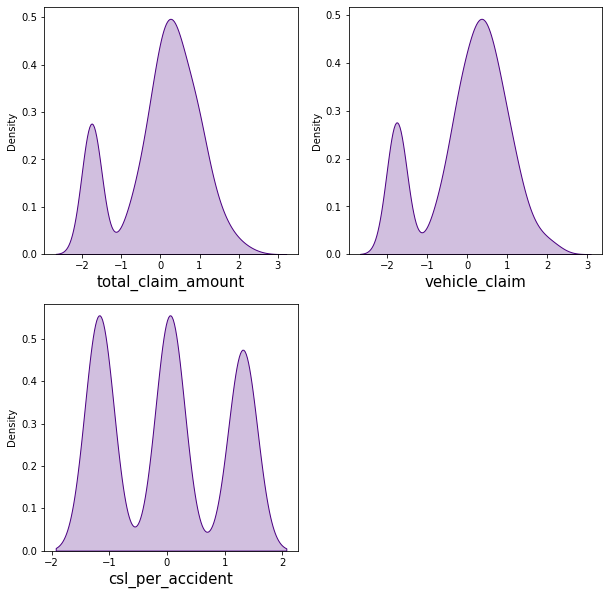

In [74]:
#checking distribution after removing skewness
plt.figure(figsize=(10,10), facecolor='white')
plotnumber = 1
for column in new_df[skew]:
    if plotnumber<=4:
        ax = plt.subplot(2,2,plotnumber)
        sns.distplot(new_df[column],color='indigo',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

The data distribution looks better after removing the skewness compared to the previous data.


### ENCODING CATEGORIAL COLUMNS USING LABEL ENCODER

In [76]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [77]:
new_df[categorical_col].head()

,policy_state,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,fraud_reported
0,2,1,4,2,17,0,2,2,0,4,4,1,1,1,10,1,1
1,1,1,4,6,15,2,3,1,1,4,5,5,0,0,8,12,1
2,2,0,6,11,2,3,0,1,1,4,1,1,0,0,4,30,0
3,0,0,6,1,2,4,2,0,0,4,2,0,0,0,3,34,1
4,0,1,0,11,2,4,3,1,1,2,1,0,0,0,0,31,0


The categorical columns have been converted into numerical columns by using label encoding.

## CORRELATION

In [78]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,policy_bind_day,incident_day,csl_per_person,csl_per_accident,Vehicle_Age
months_as_customer,1.000000,0.922092,0.000118,0.023512,-0.003378,0.059002,-0.000848,0.005365,-0.092575,0.071097,...,0.041157,0.062392,0.049222,0.002908,0.020966,0.054175,-0.013502,-0.022063,-0.022928,-0.001287
age,0.922092,1.000000,-0.015182,0.026772,0.005890,0.072900,0.001485,0.014030,-0.080587,0.075940,...,0.064230,0.062165,0.032105,0.016258,0.012408,0.054465,-0.008174,-0.012844,-0.012459,-0.003268
policy_state,0.000118,-0.015182,1.000000,0.010740,0.014475,-0.019294,-0.032551,-0.031016,-0.040215,-0.018855,...,0.002678,-0.000472,0.015848,-0.024513,0.028864,0.001030,0.013370,-0.005866,-0.000653,-0.002323
policy_deductable,0.023512,0.026772,0.010740,1.000000,-0.008445,-0.011671,0.014571,-0.050024,0.005134,-0.021763,...,0.069537,0.005902,-0.034266,-0.003597,0.015833,0.011204,-0.018867,0.006634,0.006179,-0.027497
policy_annual_premium,-0.003378,0.005890,0.014475,-0.008445,1.000000,0.041830,-0.021475,0.030963,-0.014376,0.006474,...,-0.007964,0.012961,0.011595,-0.034998,-0.010174,-0.030886,0.016400,0.028569,0.030755,0.040439
insured_sex,0.059002,0.072900,-0.019294,-0.011671,0.041830,1.000000,0.007473,-0.009257,-0.019600,0.004104,...,-0.009457,-0.026816,0.026040,-0.017679,0.032173,0.045694,-0.007249,-0.019001,-0.008959,0.028638
insured_education_level,-0.000848,0.001485,-0.032551,0.014571,-0.021475,0.007473,1.000000,-0.021502,0.022806,-0.021595,...,0.058663,0.070001,0.057528,0.050878,0.011520,0.014464,-0.055411,0.011093,0.010425,-0.045094
insured_occupation,0.005365,0.014030,-0.031016,-0.050024,0.030963,-0.009257,-0.021502,1.000000,-0.009818,-0.008141,...,0.008301,0.000954,0.044321,0.020878,0.003335,-0.003030,-0.022786,0.018978,0.019575,0.004827
insured_hobbies,-0.092575,-0.080587,-0.040215,0.005134,-0.014376,-0.019600,0.022806,-0.009818,1.000000,-0.097837,...,0.009925,-0.015968,-0.000055,0.031208,-0.047983,0.028387,0.014295,-0.013322,-0.007772,0.015606
insured_relationship,0.071097,0.075940,-0.018855,-0.021763,0.006474,0.004104,-0.021595,-0.008141,-0.097837,1.000000,...,0.006420,-0.005901,-0.029954,0.062286,0.017992,0.008900,-0.083525,-0.022125,-0.031298,0.026099


<AxesSubplot:>

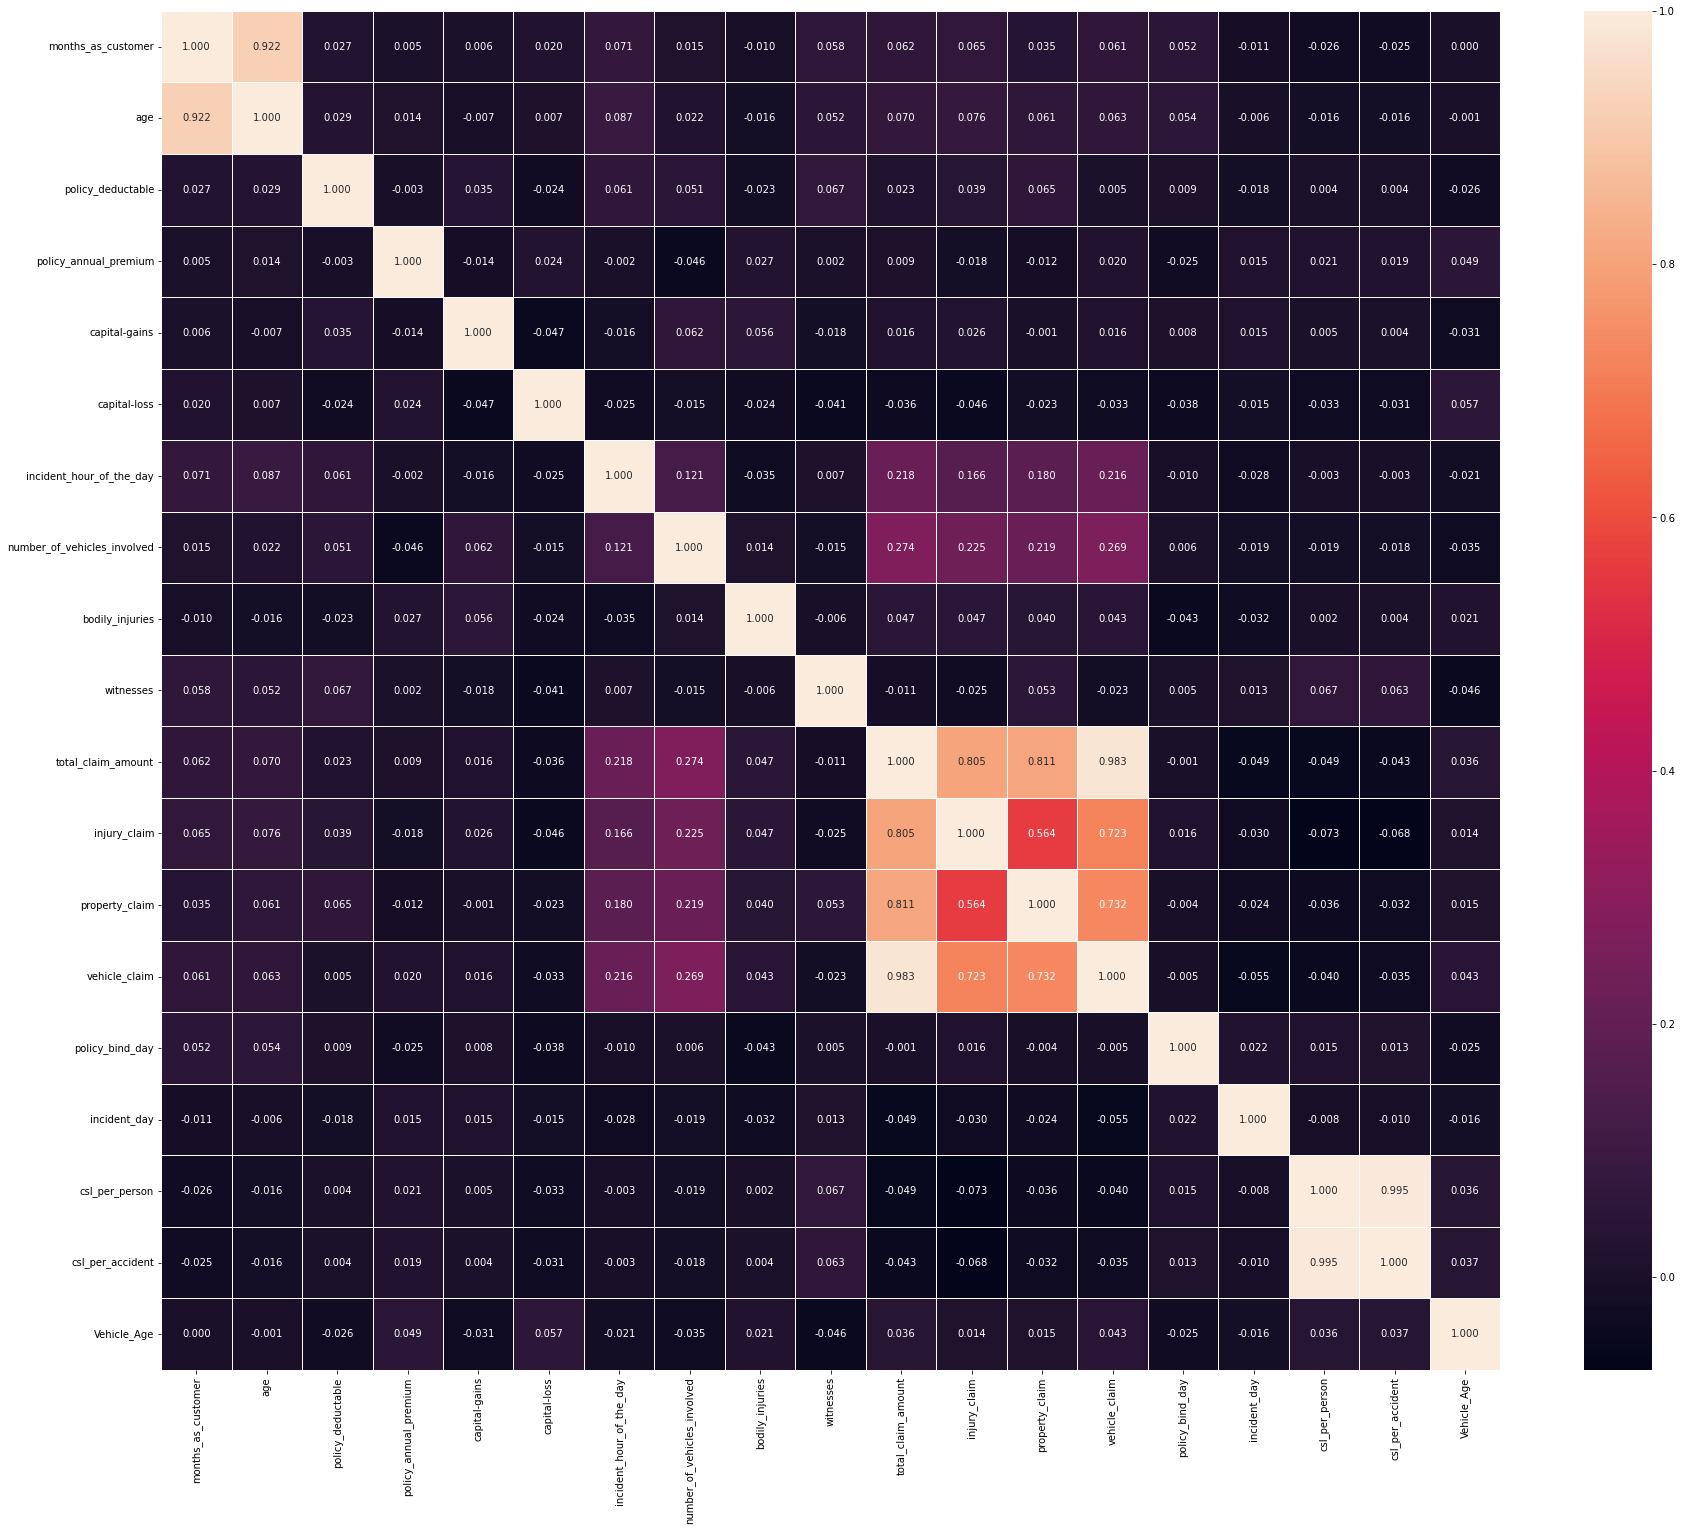

In [79]:
#ploting heatmap of correlation of all variables of data set
plt.figure(figsize=(30,25))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt='.3f')

##### Visualizing the correlation between label and features using bar plot

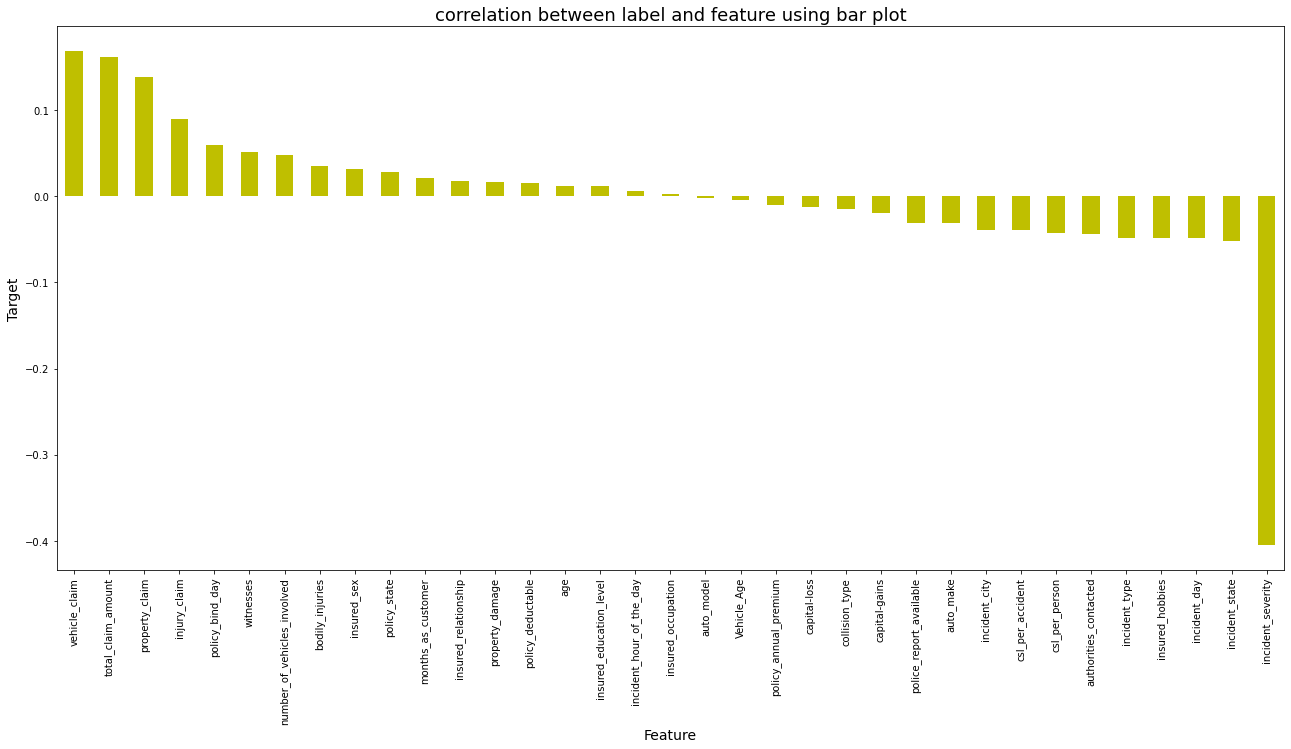

In [80]:
plt.figure(figsize=(22,10))
new_df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

OBSERVATION

Since the heatmap was not able to give us a clearer picture on positive and negative correlation columns we have generated this bar plot and we see that more than half the feature columns are positively correlated with our target label while all the remaining features are negatively correlated with our label column. This indicates that they are all required for the prediction of our classification label.
   ]

##### Splitting the new dataset into Features and Target

In [82]:
x = new_df.drop("fraud_reported", axis=1)
y = new_df["fraud_reported"]

In [83]:
# Dimension of x
x.shape

(996, 35)

In [84]:
# Dimension of y
y.shape

(996,)

### SMOTE (STANDARDISING TARGET COLUMN)

In [85]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [86]:
y.value_counts()

1    750
0    750
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

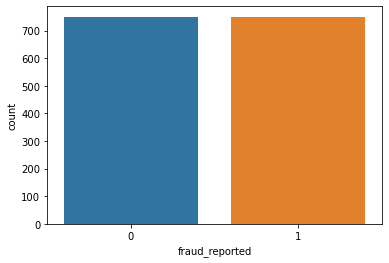

In [87]:
# Visualize the data after balancing
sns.countplot(y)

### STANDARD SCALING

In [88]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,policy_bind_day,incident_day,csl_per_person,csl_per_accident,Vehicle_Age
0,1.112864,1.028789,1.352465,-0.253387,0.675597,1.252395,0.642346,-1.185830,1.430086,-1.453766,...,-0.276330,1.147027,0.710266,0.979875,-1.739795,0.147683,1.244514,-0.107579,0.095671,0.239447
1,0.202029,0.345864,0.085321,1.446092,-0.246811,1.252395,0.642346,-0.125633,1.055129,-0.188888,...,-1.513729,-1.526698,-2.098719,0.453721,-0.685645,1.345113,0.837876,-0.107579,0.095671,-0.283617
2,-0.654155,-1.133807,1.352465,1.446092,0.703002,-0.798470,1.728001,1.199613,-1.382092,0.443550,...,-0.019348,-0.856082,-1.030632,-0.598588,1.039328,-0.810261,0.939536,-1.100008,-1.212061,-0.283617
3,0.457063,0.232043,-1.181823,1.446092,0.714440,-0.798470,1.728001,-1.450879,-1.382092,1.075989,...,-0.313042,-0.312163,0.626142,-0.861666,1.422656,1.105627,-1.195311,-0.107579,0.095671,-1.504098
4,0.202029,0.573505,-1.181823,-0.253387,1.454205,1.252395,-1.528964,1.199613,-1.382092,1.075989,...,-1.401434,-1.555095,-2.047175,-1.650897,1.135160,-1.169490,0.431239,1.546469,1.439737,-0.632326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1.039997,0.914968,-1.181823,-0.253387,-0.524797,1.252395,-0.986137,-0.125633,0.680172,0.443550,...,0.838408,0.378113,0.022564,0.190643,0.464337,-0.451032,-0.280377,-1.100008,-1.212061,0.413801
1496,-0.590397,-1.019987,0.085321,-1.103126,0.466679,1.252395,-0.443309,1.464662,-0.632178,-0.188888,...,1.315876,-0.180879,0.805955,-0.598588,0.272674,-0.091803,-0.585355,-0.226671,-0.331518,-0.981035
1497,-0.271605,-0.109420,-1.181823,-0.555894,0.179905,-0.798470,-1.528964,0.669514,-0.444699,0.443550,...,-0.346946,-0.515313,0.128598,0.190643,0.176842,-0.091803,-0.077058,0.243079,0.384921,0.936865
1498,1.240380,1.484072,0.085321,0.443400,1.158641,-0.798470,-0.443309,0.669514,0.492694,-0.188888,...,1.470065,-0.102896,0.807813,-0.072434,0.751833,0.746398,-1.093651,0.540808,0.624041,0.413801


### MULTICOLLINEARITY

In [89]:
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [91]:
calc_vif(x)

,variables,VIF FACTOR
0,months_as_customer,7.098604
1,age,7.064534
2,policy_state,1.048283
3,policy_deductable,1.037181
4,policy_annual_premium,1.044071
5,insured_sex,1.068659
6,insured_education_level,1.039505
7,insured_occupation,1.030528
8,insured_hobbies,1.066138
9,insured_relationship,1.060963


We can observe some columns have VIF above 10 that means they are causing multicollinearity problem. Let's drop the feature having high VIF value amongst all the columns.

In [92]:
# Dropping total_claim_amount column as it contains high VIF value
x.drop(["total_claim_amount"],axis=1,inplace=True)

In [93]:
calc_vif(x)

,variables,VIF FACTOR
0,months_as_customer,7.080746
1,age,7.063308
2,policy_state,1.048006
3,policy_deductable,1.037170
4,policy_annual_premium,1.042662
5,insured_sex,1.067483
6,insured_education_level,1.039449
7,insured_occupation,1.029773
8,insured_hobbies,1.065183
9,insured_relationship,1.060094


In [95]:
# Dropping csl_per_accident column
x.drop(["csl_per_accident"],axis=1,inplace=True)

In [96]:
calc_vif(x)

,variables,VIF FACTOR
0,months_as_customer,7.080704
1,age,7.063301
2,policy_state,1.047862
3,policy_deductable,1.037160
4,policy_annual_premium,1.038825
5,insured_sex,1.064038
6,insured_education_level,1.039440
7,insured_occupation,1.029218
8,insured_hobbies,1.062443
9,insured_relationship,1.058300


Now we have overcome the multicollinearity issue as all the VIF values are less than 10 in all the columns

## MACHINE LEARNING

##### Finding best random state

In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
rf = RandomForestClassifier()

In [98]:
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9166666666666666  on Random_state  15


### Feature importance bar graph

,Importance
Features,
incident_severity,0.226
vehicle_claim,0.047
csl_per_person,0.042
insured_hobbies,0.042
property_claim,0.041
injury_claim,0.040
incident_state,0.032
policy_annual_premium,0.032
incident_hour_of_the_day,0.030


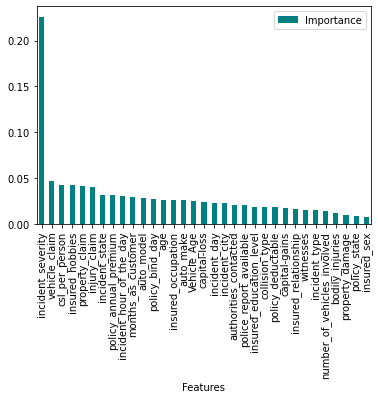

In [99]:
rf.fit(x_train, y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

This bar plot shows us the importance of the features using random forest algorithm on predicting our Target variable

In [117]:
# Importing required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [104]:
# creating a function to run all the classifiers

def classifier(model, x, y):
    x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=15)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [105]:
#Logistic Regression
model = LogisticRegression()
classifier(model, x, y)

Accuracy Score: 83.0

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       151
           1       0.82      0.85      0.83       149

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Cross Validation Score: 79.13333333333334

Accuracy Score - Cross Validation Score is 3.86666666666666


In [106]:
#GAUSSIAN NAIVE BAYES
model = GaussianNB()
classifier(model, x, y)

Accuracy Score: 79.33333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.75      0.79       151
           1       0.77      0.83      0.80       149

    accuracy                           0.79       300
   macro avg       0.80      0.79      0.79       300
weighted avg       0.80      0.79      0.79       300

Cross Validation Score: 77.46666666666667

Accuracy Score - Cross Validation Score is 1.86666666666666


In [107]:
#SVC CLASSIFIER(RBF)
model = SVC(kernel='rbf')
classifier(model, x, y)

Accuracy Score: 86.0

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.86       151
           1       0.86      0.85      0.86       149

    accuracy                           0.86       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.86      0.86      0.86       300

Cross Validation Score: 82.13333333333333

Accuracy Score - Cross Validation Score is 3.8666666666666742


In [108]:
#SVC(LINEAR)
model = SVC(kernel='linear')
classifier(model, x,  y)

Accuracy Score: 85.0

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       151
           1       0.84      0.86      0.85       149

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Cross Validation Score: 79.86666666666667

Accuracy Score - Cross Validation Score is 5.133333333333326


In [109]:
#SVC(POLY)
model = SVC(kernel='poly')
classifier(model, x, y)

Accuracy Score: 82.33333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.70      0.80       151
           1       0.76      0.95      0.84       149

    accuracy                           0.82       300
   macro avg       0.84      0.82      0.82       300
weighted avg       0.84      0.82      0.82       300

Cross Validation Score: 82.73333333333333

Accuracy Score - Cross Validation Score is -0.3999999999999915


In [118]:
#DECISION TREE CLASSIFIER
model = DecisionTreeClassifier()
classifier(model, x, y)

Accuracy Score: 82.0

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.79      0.82       151
           1       0.80      0.85      0.82       149

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

Cross Validation Score: 81.46666666666667

Accuracy Score - Cross Validation Score is 0.5333333333333314


In [111]:
#SGD CLASSIFIER
model = SGDClassifier()
classifier(model, x, y)

Accuracy Score: 73.0

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.77      0.74       151
           1       0.75      0.68      0.72       149

    accuracy                           0.73       300
   macro avg       0.73      0.73      0.73       300
weighted avg       0.73      0.73      0.73       300

Cross Validation Score: 75.6

Accuracy Score - Cross Validation Score is -2.5999999999999943


In [112]:
#RANDOM FOREST CLASSIFIER
model = RandomForestClassifier(random_state=15)
classifier(model, x, y)

Accuracy Score: 91.0

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.91       151
           1       0.88      0.95      0.91       149

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

Cross Validation Score: 85.33333333333333

Accuracy Score - Cross Validation Score is 5.666666666666671


In [113]:
#EXTRATREES CLASSIFIER
model = ExtraTreesClassifier()
classifier(model, x, y)

Accuracy Score: 91.0

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.91      0.91      0.91       149

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

Cross Validation Score: 85.46666666666667

Accuracy Score - Cross Validation Score is 5.533333333333331


In [114]:
#ADA BOOST CLASSIFIER
model = AdaBoostClassifier()
classifier(model, x, y)

Accuracy Score: 83.66666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       151
           1       0.85      0.81      0.83       149

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

Cross Validation Score: 82.66666666666667

Accuracy Score - Cross Validation Score is 1.0


In [115]:
#GRADIENT BOOSTING CLASSIFIER
model = GradientBoostingClassifier()
classifier(model, x, y)

Accuracy Score: 88.0

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       151
           1       0.86      0.90      0.88       149

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Cross Validation Score: 84.73333333333335

Accuracy Score - Cross Validation Score is 3.2666666666666515


OBSERVATION

Comparing all the above the ExtraTreesClassifier gives the best results since the Accuracy Score - Cross Validation Score is the least along with higher Cross Validation Score and the highest Accuracy Score comparing all the models.

#### HYPER PARAMETER TUNING

##### Creating train_test split

In [119]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=15)


In [120]:
x_test.shape

(300, 33)

In [121]:
y_test.shape

(300,)

In [122]:
y_train.shape

(1200,)

In [123]:
#creating parameters list to pass into GridSearchCV

parameters = {'criterion' : ['gini', 'entropy'],
              'max_features' : ['auto', 'sqrt', 'log2'],
              'n_jobs' : [-2, -1, 1],
              'random_state' : [None, 29],
              'n_estimators': [100, 200, 300]}

In [124]:
GCV = GridSearchCV(ExtraTreesClassifier(), parameters, cv=5)

In [125]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300], 'n_jobs': [-2, -1, 1],
                         'random_state': [None, 29]})

In [127]:
GCV.best_params_

{'criterion': 'gini',
 'max_features': 'auto',
 'n_estimators': 200,
 'n_jobs': -2,
 'random_state': None}

##### FINAL MODEL

In [128]:
final_modelc = ExtraTreesClassifier(criterion = 'gini', max_features = 'log2', n_estimators = 200, n_jobs = -2 , random_state = None)

In [129]:
# final fit
final_fitc = final_modelc.fit(x_train,y_train)

In [130]:
# predicting with best parameters
final_predc = final_modelc.predict(x_test)

In [131]:
 # checking accuracy score
best_acc_score = (accuracy_score(y_test, final_predc))*100
print("The Accuracy Score for the Best Model is ", best_acc_score)

The Accuracy Score for the Best Model is  92.33333333333333


In [135]:
# Final Cross Validation Score
final_cv_score = (cross_val_score(final_modelc, x, y, cv=5).mean())*100
print("Cross Validation Score:", final_cv_score)

Cross Validation Score: 85.93333333333334


In [137]:
#Final Classification Report
final_class_report = classification_report(y_test, final_predc)
print("\nClassification Report:\n", final_class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       151
           1       0.90      0.95      0.92       149

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



#### AUC ROC CURVE

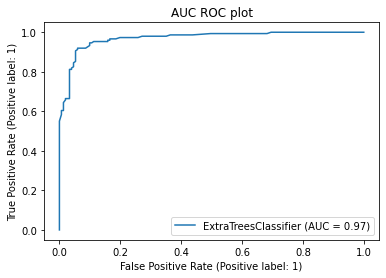

In [138]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(final_modelc, x_test, y_test)
plt.title("AUC ROC plot")
plt.show()

AUC score is 0.97 which is really good.

##### SAVING MODEL IN PICKLE FORMAT

In [139]:
#pickeling or serialization of a file
import pickle
filename = 'Insurance_Claims_Fraud_Detection_Final_Model.pkl'
pickle.dump(final_modelc, open(filename, 'wb'))

### PREDICTION COCLUSION

In [140]:
import numpy as np
ac=np.array(y_test)
predictedc=np.array(final_modelc.predict(x_test))
df_comparisonc = pd.DataFrame({"original":ac,"predicted":predictedc},index= range(len(ac)))
df_comparisonc

,original,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
295,1,1
296,0,0
297,1,1
298,1,1


In [141]:
#Saving the comparison file as a csv file.
df_comparisonc.to_csv('Insurance_Claims_Fraud_Detection_Prediction.csv')

### FINAL CONCLUSION

We found the best Regressor EXTRA TREES CLASSIFIER for our problem with 92% accuracy.

Using this machine Learning Model, we can predict whether the insurance claim is fraudulent or not and we could reject those application which will be considered as fraud claims. Saving the Insurance industry from possible fraudsters.

***********************************************************************************************************THANK YOU**************************************************************************************************